In [39]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.isidewith.com/polls/popular'
response = requests.get(url)

issues_votes = []

if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')
    polls = soup.find_all('div', class_='poll')
    
    for poll in polls:
        # Correctly identifying the issue name
        img_div = poll.find('div', class_='img')
        if img_div:
            p_tag = img_div.find('p')
            if p_tag:
                span_tag = p_tag.find('span')
                if span_tag:
                    issue_name = span_tag.text.strip()

                    #ddjusting logic for finding vote count
                    count_div = poll.find('div', class_='count')
                    if count_div:
                        vote_text = count_div.text.strip().split()[0].replace(',', '')
                        vote_count = int(vote_text) if vote_text.isdigit() else 0
                        
                        #appending issue name and vote count to the list
                        issues_votes.append((issue_name, vote_count))

    #sorting and extracting the top 100 issues based on vote count
    issues_votes.sort(key=lambda x: x[1], reverse=True)



In [40]:
issues = [issue[0] for issue in issues_votes]
for issue in issues:
    print(issue)
print(issues)

Abortion
Gay Marriage
Gun Control
LGBT Adoption Rights
Gender Transition
Gender Identity
Police Body Cameras
Drug Price Regulation
Transgender Athletes
Equal Pay
Planned Parenthood Funding
Deporting Criminal Immigrants
Minimum Wage
Armed Teachers
Marital Rape
Climate Change
Taxes
Israel
Border Security
Paid Sick Leave
Gun Buyback
Term Limits
Student Loans
Free College for All
Critical Race Theory in K-12 Education
Single-Payer Healthcare
NATO
Immigration
Religious Freedom Act
Supreme Court Reform
Mental Health
Immigration Healthcare
Medicaid
Mandatory Vaccinations
Alaska Wildlife Refuge
Pre-Existing Conditions
Foreign Lobbying
Hate Speech
Government Mandates
No-Fly List Gun Control
Government Spending
Voter Fraud
Mandatory Military Service
Social Media Regulation
Immigrant Laborers
Affirmative Action
Border Wall
Death Penalty
Marijuana
Citizenship Test
COVID Employment Health Pass
Campaign Finance
Drug Policy
Safe Haven
Illegal Immigrant Detainment
Right of Foreigners to Vote
Criminal 

In [ ]:
'''from ntscraper import Nitter
import pandas as pd

scraper = Nitter(log_level=1)
'''



In [ ]:
'''from ntscraper import Nitter
import pandas as pd
import time

results = []

def scrape_data_for_term(issue):
    try:
        tweets = scraper.get_tweets(issue, mode='term', number=5, language='en')
        if isinstance(tweets, list):
            for tweet in tweets:
                if isinstance(tweet, dict):
                    results.append({
                        'issue': issue,
                        'tweet': tweet.get('content', ''),
                        'likes': tweet.get('likeCount', 0),
                        'retweets': tweet.get('retweetCount', 0),
                        # Add other fields as needed
                    })
        else:
            print(f"No valid tweets returned for {issue}")
    except Exception as e:
        print(f"Error while fetching data for {issue}: {str(e)}")
        time.sleep(60)  # Sleep to avoid hitting rate limit quickly

for issue in issues:
    scrape_data_for_term(issue)

df = pd.DataFrame(results)
df.to_csv('scraped_tweets.csv', index=False)
print("Data scraping complete. Results saved to 'scraped_tweets.csv'.")
'''

In [ ]:
'''import tweepy

auth = tweepy.OAuthHandler("E25G8XB4oorLGCTdo3U8ZsXfn", "0jBPTkYVU6zsMvcUAf1RqVFxbvI6OeiXuVFzhUpMpCIRvHOzKX")
auth.set_access_token("1328482358044012544-2q2pCvQR9GiZv80nqEHKGuCvVSDdRB", "8VoFpz5A2f824soL0adWjSxfml4220weD4GPPgqIBSeRh")

api = tweepy.API(auth)

for issue in issues:
    tweets = api.search_tweets(q=issue, count=1)  # Adjust count as needed
    for tweet in tweets:
        print(tweet.text, tweet.favorite_count, tweet.retweet_count, tweet.reply_count, tweet.author.followers_count)

'''

Epoch 1, Train Loss: 115.81255654112934, Test Loss: 114.0448162681178
Epoch 2, Train Loss: 111.5858142800527, Test Loss: 109.32785315262645
Epoch 3, Train Loss: 105.71935167704542, Test Loss: 102.00256387810958
Epoch 4, Train Loss: 96.30310298971933, Test Loss: 90.74302994577508
Epoch 5, Train Loss: 83.16285088944109, Test Loss: 76.11221755178352
Epoch 6, Train Loss: 68.6073176762829, Test Loss: 59.69175820601614
Epoch 7, Train Loss: 53.0079386462904, Test Loss: 43.60372874611303
Epoch 8, Train Loss: 38.562216510511426, Test Loss: 30.688786556846217
Epoch 9, Train Loss: 30.050025992197533, Test Loss: 22.101786914624665
Epoch 10, Train Loss: 26.749289669402657, Test Loss: 18.047714534558747
Epoch 11, Train Loss: 24.168379561541833, Test Loss: 15.5026922727886
Epoch 12, Train Loss: 24.20378000442296, Test Loss: 14.308306167000218
Epoch 13, Train Loss: 22.0039796567943, Test Loss: 13.35931150536788
Epoch 14, Train Loss: 22.193793074725427, Test Loss: 12.885478044811048
Epoch 15, Train Los

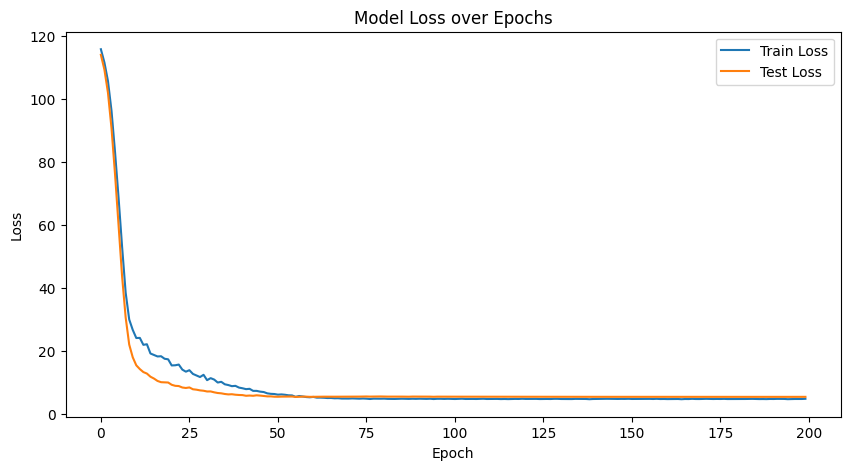

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load and preprocess data
df = pd.read_csv("FixedData.csv")

df['followers'] = np.log1p(df['followers'])

features = df[['likeCount', 'replyCount', 'quoteCount', 'retweetCount','viewCount']].values
views = df['followers'].values.reshape(-1, 1)

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features_scaled, views, test_size=0.2, random_state=42)

train_features = torch.tensor(X_train, dtype=torch.float32)
test_features = torch.tensor(X_test, dtype=torch.float32)
train_views = torch.tensor(y_train, dtype=torch.float32)
test_views = torch.tensor(y_test, dtype=torch.float32)
train_dataset = TensorDataset(train_features, train_views)
test_dataset = TensorDataset(test_features, test_views)

# Define the neural network
class FollowerPredictorMLP(nn.Module):
    def __init__(self):
        super(FollowerPredictorMLP, self).__init__()
        self.layer1 = nn.Linear(5, 10)  # 4 features to 10 hidden nodes
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)
        self.layer2 = nn.Linear(10, 8)
        self.output = nn.Linear(8, 1)  # Output is log(followersCount)

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.dropout(x)
        x = self.relu(self.layer2(x))
        x = self.output(x)
        return x

# Assuming model is trained and setup as shown in your previous code
model = FollowerPredictorMLP()
optimizer = optim.Adam(model.parameters(), lr=0.0005)
loss_fn = nn.MSELoss()
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.1)

# Training function
def train_model(model, train_dataset, test_dataset, epochs=200):
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
    
    train_losses, test_losses = [], []
    for epoch in range(epochs):
        total_train_loss = 0
        model.train()
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = loss_fn(outputs, targets)
            loss.backward()
            optimizer.step()
            total_train_loss += loss.item()
        
        scheduler.step()  # Adjust the learning rate
        total_train_loss /= len(train_loader)
        train_losses.append(total_train_loss)

        total_test_loss = 0
        model.eval()
        with torch.no_grad():
            for inputs, targets in test_loader:
                outputs = model(inputs)
                loss = loss_fn(outputs, targets)
                total_test_loss += loss.item()
        total_test_loss /= len(test_loader)
        test_losses.append(total_test_loss)
        
        print(f'Epoch {epoch+1}, Train Loss: {total_train_loss}, Test Loss: {total_test_loss}')

    return train_losses, test_losses

train_losses, test_losses = train_model(model, train_dataset, test_dataset)

# Plot training and test losses
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss over Epochs')
plt.legend()
plt.show()


In [35]:

# Assuming the model has been trained, let's extract the weights
model.eval()
first_layer_weights = model.layer1.weight.data.numpy()

# The shape of first_layer_weights is [10, 4] (10 nodes in the first hidden layer, 4 input features)
# We need to aggregate these weights to get a single weight per input feature
# One simple way to do this is to take the mean of the weights across all nodes in the first hidden layer
importance_weights = np.mean(first_layer_weights, axis=0)

# Now you can use these weights to calculate the User Influence Score
df['UserInfluenceScore'] = np.dot(df[['likeCount', 'replyCount', 'quoteCount', 'retweetCount', 'viewCount']], importance_weights)

# Print the importance weights for inspection
print("Importance Weights for each feature:", importance_weights)


Importance Weights for each feature: [-0.00655102  0.07420012 -0.00024425  0.1240044  -0.01478469]


Epoch 1, Train Loss: 97.66573490508615, Test Loss: 97.95496850264699
Epoch 2, Train Loss: 93.30171882942932, Test Loss: 91.07100235788445
Epoch 3, Train Loss: 81.42537062135462, Test Loss: 72.05463810970909
Epoch 4, Train Loss: 56.57712419065711, Test Loss: 40.124937559428965
Epoch 5, Train Loss: 28.348823795579886, Test Loss: 14.214320232993678
Epoch 6, Train Loss: 16.795247626631227, Test Loss: 7.3859070476732755
Epoch 7, Train Loss: 13.659133120758893, Test Loss: 6.432135594518561
Epoch 8, Train Loss: 15.338207499621666, Test Loss: 6.080680044073808
Epoch 9, Train Loss: 13.421657209527003, Test Loss: 5.396355290161936
Epoch 10, Train Loss: 13.423177203086958, Test Loss: 5.33576310308356
Epoch 11, Train Loss: 10.782927049349432, Test Loss: 4.945628668132581
Epoch 12, Train Loss: 12.547709308258474, Test Loss: 4.714669917759142
Epoch 13, Train Loss: 11.068843959129019, Test Loss: 4.587944683275725
Epoch 14, Train Loss: 9.773938727705445, Test Loss: 4.192345468621505
Epoch 15, Train Lo

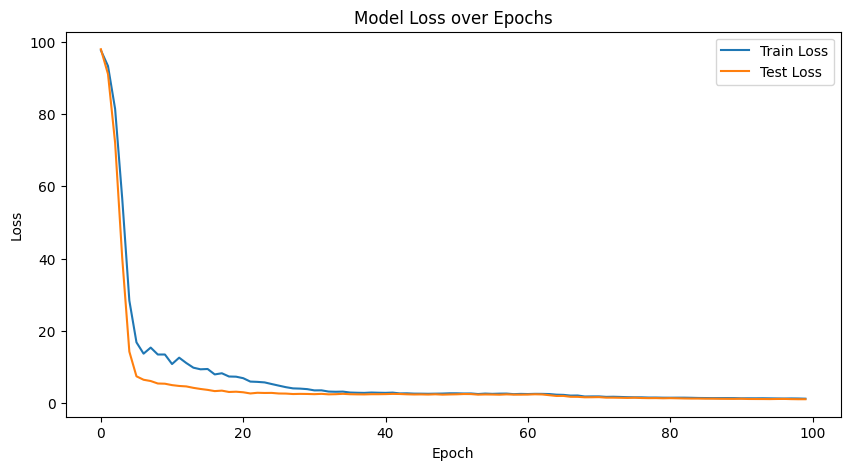

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load and preprocess data
df = pd.read_csv("FixedData.csv")

df['viewCount'] = np.log1p(df['viewCount'])

features = df[['likeCount', 'replyCount', 'quoteCount', 'retweetCount', 'followers']].values
views = df['viewCount'].values.reshape(-1, 1)

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features_scaled, views, test_size=0.2, random_state=42)

train_features = torch.tensor(X_train, dtype=torch.float32)
test_features = torch.tensor(X_test, dtype=torch.float32)
train_views = torch.tensor(y_train, dtype=torch.float32)
test_views = torch.tensor(y_test, dtype=torch.float32)
train_dataset = TensorDataset(train_features, train_views)
test_dataset = TensorDataset(test_features, test_views)



# Define the model
class EngagementMLP(nn.Module):
    def __init__(self):
        super(EngagementMLP, self).__init__()
        self.layer1 = nn.Linear(5, 10)  # Input dimension adjusted for 5 features
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)
        self.layer2 = nn.Linear(10, 8)  # Correct input dimension from previous layer
        self.output = nn.Linear(8, 1)

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.dropout(x)
        x = self.relu(self.layer2(x))
        x = self.output(x)
        return x

model = EngagementMLP()
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.1)  # Learning rate scheduler

# Training function
def train_model(model, train_dataset, test_dataset, epochs=100):
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
    
    train_losses, test_losses = [], []
    for epoch in range(epochs):
        total_train_loss = 0
        model.train()
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = loss_fn(outputs, targets)
            loss.backward()
            optimizer.step()
            total_train_loss += loss.item()
        
        scheduler.step()  # Adjust the learning rate
        total_train_loss /= len(train_loader)
        train_losses.append(total_train_loss)

        total_test_loss = 0
        model.eval()
        with torch.no_grad():
            for inputs, targets in test_loader:
                outputs = model(inputs)
                loss = loss_fn(outputs, targets)
                total_test_loss += loss.item()
        total_test_loss /= len(test_loader)
        test_losses.append(total_test_loss)
        
        print(f'Epoch {epoch+1}, Train Loss: {total_train_loss}, Test Loss: {total_test_loss}')

    return train_losses, test_losses

train_losses, test_losses = train_model(model, train_dataset, test_dataset)

# Plot training and test losses
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss over Epochs')
plt.legend()
plt.show()



In [2]:
from sklearn.linear_model import LinearRegression

# Train a linear regression model
reg = LinearRegression().fit(X_train, y_train)

# Extract coefficients
feature_weights = reg.coef_

# Normalize weights to use in the engagement score
normalized_weights = feature_weights / np.sum(np.abs(feature_weights))

print("Normalized Weights for Features: ", normalized_weights)


Normalized Weights for Features:  [[0.12716806 0.1608259  0.27278043 0.25183747 0.18738814]]


searchTerm
Abortion              201299.158038
Affirmative Action     33628.320055
Border Camps           51108.340298
China Taiwan           53856.392846
Climate Change         93976.836557
Name: EngagementScore, dtype: float64


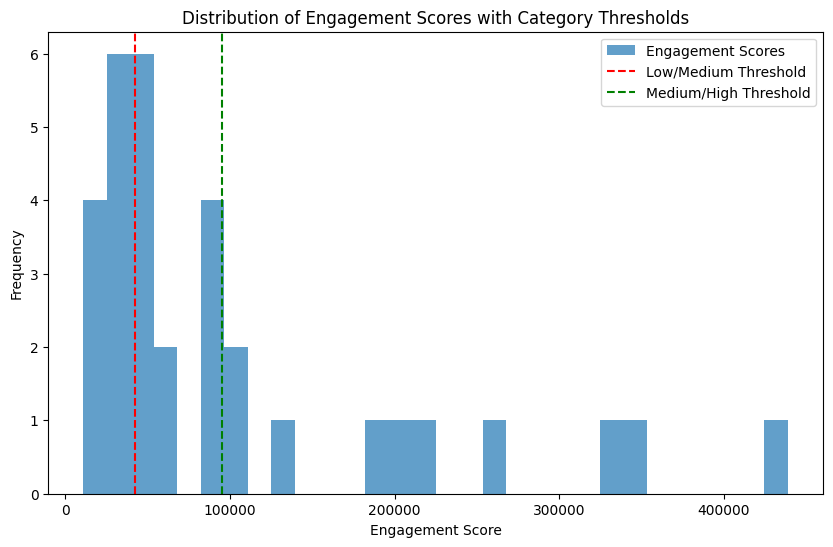

Engagement Scores by Topic:
searchTerm
Abortion                                                             201299.158038
Affirmative Action                                                    33628.320055
Border Camps                                                          51108.340298
China Taiwan                                                          53856.392846
Climate Change                                                        93976.836557
Detention Camps                                                       62458.390580
Euthanasia                                                            49027.342784
Felon Voting Rights                                                   33453.988890
Felon Voting Rights RIghts                                           438830.574332
GMO                                                                   29279.388257
Gay Marriage                                                          16921.474314
Gun Control                                     

In [4]:
import matplotlib.pyplot as plt


# Assuming 'df' is your DataFrame and 'normalized_weights' contains the weights for each feature
# Calculate the engagement score for each tweet
features = ['likeCount', 'replyCount', 'quoteCount', 'retweetCount', 'followers']
df['EngagementScore'] = df[features].dot(normalized_weights.T)

# Aggregate scores by political topic
topic_engagement = df.groupby('searchTerm')['EngagementScore'].mean()

# Determine thresholds for "low", "medium", and "high" engagement
low_threshold, high_threshold = topic_engagement.quantile([0.33, 0.66])

# Assign categories based on these thresholds
def categorize_engagement(score):
    if score <= low_threshold:
        return 'Low'
    elif score <= high_threshold:
        return 'Medium'
    else:
        return 'High'

# Assuming 'topic_engagement' is a DataFrame and you have a column 'EngagementScore' for plotting
topic_engagement = df.groupby('searchTerm')['EngagementScore'].mean()

# Check the structure of topic_engagement
print(topic_engagement.head())

# Assuming topic_engagement is a Series with numeric values now, plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(topic_engagement.values, bins=30, alpha=0.7, label='Engagement Scores')
plt.axvline(x=topic_engagement.quantile(0.33), color='r', linestyle='--', label='Low/Medium Threshold')
plt.axvline(x=topic_engagement.quantile(0.66), color='g', linestyle='--', label='Medium/High Threshold')
plt.title('Distribution of Engagement Scores with Category Thresholds')
plt.xlabel('Engagement Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()
# Calculate the average engagement score for each searchTerm
topic_engagement = df.groupby('searchTerm')['EngagementScore'].mean()

# Print the engagement score for each searchTerm
print("Engagement Scores by Topic:")
print(topic_engagement)